In [63]:
import pandas as pd

mainData = pd.read_excel('D:\DataSets/fifa_wcup_players.xlsx')
data = mainData  #initial the using data

In [64]:
# some of the columns have whitespace
# so i fix it
data.columns = [i.strip() for i in data.columns]  #delete columns spaces

In [65]:
#Some data have values but are null
#So I make them 'None'
data.replace({'N.A': None, '-': None, 'N,A': None}, inplace=True)

In [66]:
data.isna().sum()  #i am watching the nulls :D

Nationality                      0
FIFA Ranking                     0
National Team Kit Sponsor        1
Position                         0
National Team Jersey Number      1
Player DOB                       0
Club                             2
Player Name                      0
Appearances                    153
Goals Scored                   230
Assists Provided               230
Dribbles per 90                251
Interceptions per 90           251
Tackles per 90                 259
Total Duels Won per 90         281
Save Percentage                776
Clean Sheets                   776
Brand Sponsor/Brand Used         2
dtype: int64

In [67]:
#I think I can fill columns that have less null.
#like National Team Kit Sponsor,National Team Jersey Number,ClubBrand Sponsor/Brand Used

# i fill National Team Kit Sponsor none value with Nationality mode
# maybe this is wrong, but i think this is the most likely value
lst = list(data[data['Nationality'] == 'USA'].index)
mode = data.loc[lst[0]:lst[-1], 'National Team Kit Sponsor'].mode()[0]
data.loc[lst[0]:lst[-1], 'National Team Kit Sponsor'].fillna(mode, inplace=True)

In [68]:
# This is not very important
data['National Team Jersey Number'].fillna(99, inplace=True)

In [69]:
#two players have not Two players do not have a club team, so I gave them the value 'Without Club'
data['Club'].fillna('Without Club', inplace=True)

In [70]:
data[data['Brand Sponsor/Brand Used'].isna()]

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
451,Qatar,60,Nike,MF,26.0,2001-03-28 00:00:00,Al-Sadd,Mustafa Tarek,None,None,None,None,None,None,None,None,None,None
694,Cameroon,33,One All Sports,DF,21.0,1995-01-26 00:00:00,Nantes,Jean Charles Castelletto,2,1,1,0,3,1.5,6,None,None,NaN


In [71]:
#i also filled this with 'Nationality' mode
import numpy as np

for i in data[data['Brand Sponsor/Brand Used'].isna()]['Nationality']:
    lst = np.array(data[data['Nationality'] == str(i)].index)
    mode = data.loc[lst[0]:lst[-1], 'Brand Sponsor/Brand Used'].mode()[0]
    data.loc[lst[0]:lst[-1], 'Brand Sponsor/Brand Used'].fillna(str(mode), inplace=True)

In [72]:
data.isna().sum()

Nationality                      0
FIFA Ranking                     0
National Team Kit Sponsor        0
Position                         0
National Team Jersey Number      0
Player DOB                       0
Club                             0
Player Name                      0
Appearances                    153
Goals Scored                   230
Assists Provided               230
Dribbles per 90                251
Interceptions per 90           251
Tackles per 90                 259
Total Duels Won per 90         281
Save Percentage                776
Clean Sheets                   776
Brand Sponsor/Brand Used         0
dtype: int64

In [73]:
# and I filled the rest of the data with zero
data.fillna(0, inplace=True)

In [74]:
data.sample(10)

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
804,Canada,53,Nike,MF,8.0,1998-02-13 00:00:00,KMSK Deinze,Liam Fraser,0,0,0,0.00,0.00,0.00,0.00,0.0000,0.00,Adidas
312,Japan,20,Adidas,DF,5.0,1986-09-12 00:00:00,Tokyo,Yuto Nagatomo,4,0,0,1.69,0.00,1.69,3.80,0.0000,0.00,Nike
383,Switzerland,12,Puma,GK,1.0,1988-12-17 00:00:00,Borussia Monchengladbach,Yann Sommer,3,0,0,0.00,0.00,0.00,0.00,0.6316,0.33,Puma
688,Cameroon,33,One All Sports,GK,23.0,1996-04-02 00:00:00,Inter,Andre Onana,1,0,0,0.00,0.00,0.00,0.00,0.6667,0.00,Adidas
134,England,5,Nike,DF,15.0,1994-01-15 00:00:00,Tottenham,Eric Dier,2,0,0,0.00,0.00,2.65,7.94,0.0000,0.00,Nike
0,Argentina,2,Adidas,GK,23.0,1992-09-02 00:00:00,Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65,0.4667,0.43,Adidas
179,Brazil,1,Nike,FW,25.0,1997-06-20 00:00:00,Flamengo,Pedro,2,0,0,0.00,1.45,2.90,14.51,0.0000,0.00,Adidas
232,USA,13,Nike,GK,1.0,1994-06-24 00:00:00,Arsenal,Matt Turner,4,0,0,0.00,0.00,0.00,0.00,0.5333,0.50,Nike
545,Saudi Arabia,49,Nike,DF,17.0,1999-02-09 00:00:00,Al-Shabab,Hassan Tambakti,2,0,0,0.00,1.00,2.00,5.50,0.0000,0.00,Nike
558,Saudi Arabia,49,Nike,FW,11.0,1993-11-01 00:00:00,Al-Hilal,Saleh Al-Shehri,3,1,0,0.80,0.00,1.20,8.00,0.0000,0.00,Adidas


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  814 non-null    object 
 1   FIFA Ranking                 814 non-null    int64  
 2   National Team Kit Sponsor    814 non-null    object 
 3   Position                     814 non-null    object 
 4   National Team Jersey Number  814 non-null    float64
 5   Player DOB                   814 non-null    object 
 6   Club                         814 non-null    object 
 7   Player Name                  814 non-null    object 
 8   Appearances                  814 non-null    int64  
 9   Goals Scored                 814 non-null    int64  
 10  Assists Provided             814 non-null    int64  
 11  Dribbles per 90              814 non-null    float64
 12  Interceptions per 90         814 non-null    float64
 13  Tackles per 90      

In [76]:
# converting the type to workable type
dfInfer = data.convert_dtypes()

In [77]:
dfInfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  814 non-null    string 
 1   FIFA Ranking                 814 non-null    Int64  
 2   National Team Kit Sponsor    814 non-null    string 
 3   Position                     814 non-null    string 
 4   National Team Jersey Number  814 non-null    Int64  
 5   Player DOB                   814 non-null    object 
 6   Club                         814 non-null    string 
 7   Player Name                  814 non-null    string 
 8   Appearances                  814 non-null    Int64  
 9   Goals Scored                 814 non-null    Int64  
 10  Assists Provided             814 non-null    Int64  
 11  Dribbles per 90              814 non-null    Float64
 12  Interceptions per 90         814 non-null    Float64
 13  Tackles per 90      

In [78]:
dfTopScore = dfInfer.sort_values("Goals Scored", ascending=False)
dfTopScore = dfTopScore.head(10)

C:\Users\asus\PycharmProjects\fifa_world_cup_players\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128016 (\N{GOAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


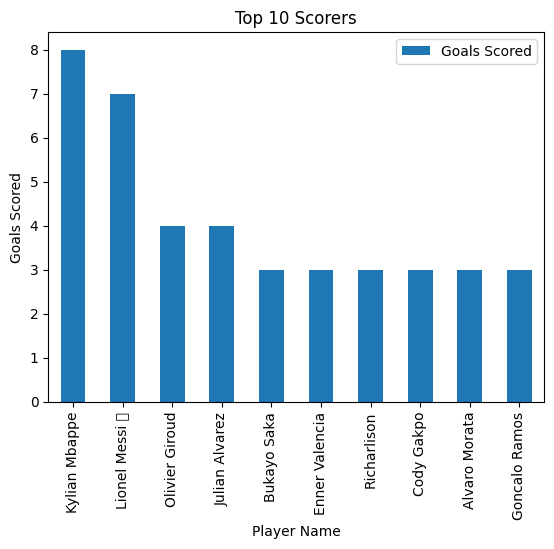

In [79]:
import matplotlib.pyplot as plt

dfTopScore.plot(x='Player Name', y='Goals Scored', kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Goals Scored')

plt.title('Top 10 Scorers')

plt.show()

In [80]:
def tops(df, columnName):
    dfTop = df.sort_values(columnName, ascending=False)
    dfTop = dfTop.head(10)



    dfTop['Player Name and Nationality'] = df['Player Name'] + " (" + df['Nationality'] + ")"

    dfTop.plot(x='Player Name and Nationality', y=columnName, kind='bar')

    plt.xlabel('Player Name')
    plt.ylabel(columnName)

    plt.title('Top 10 ' + columnName)

    plt.show()

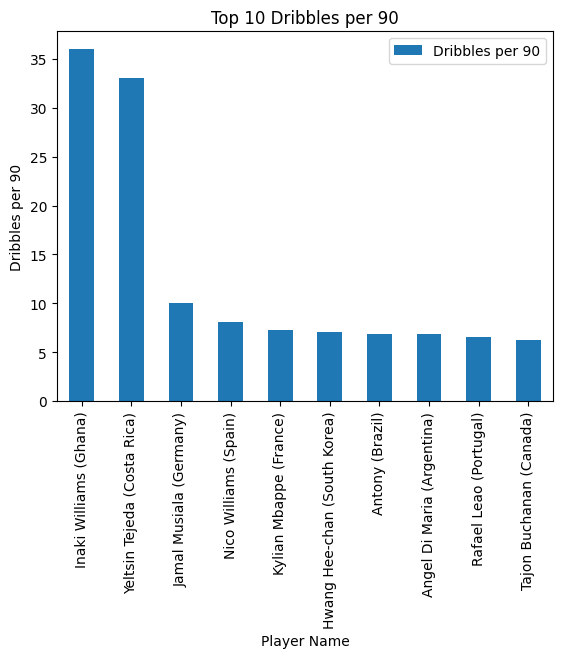

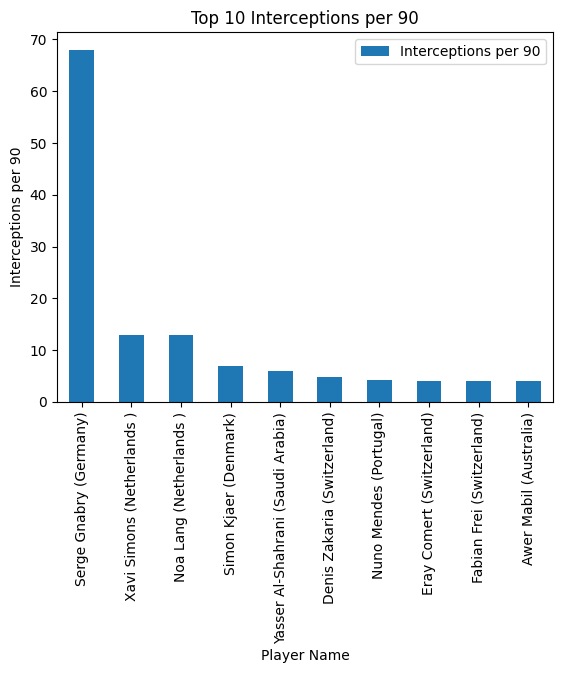

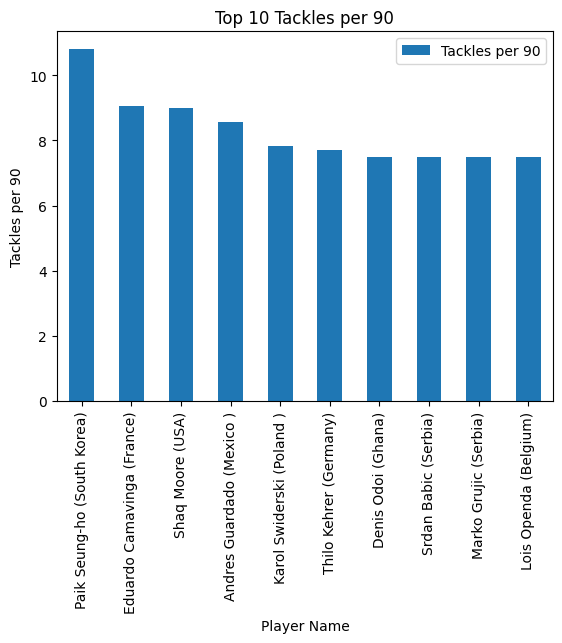

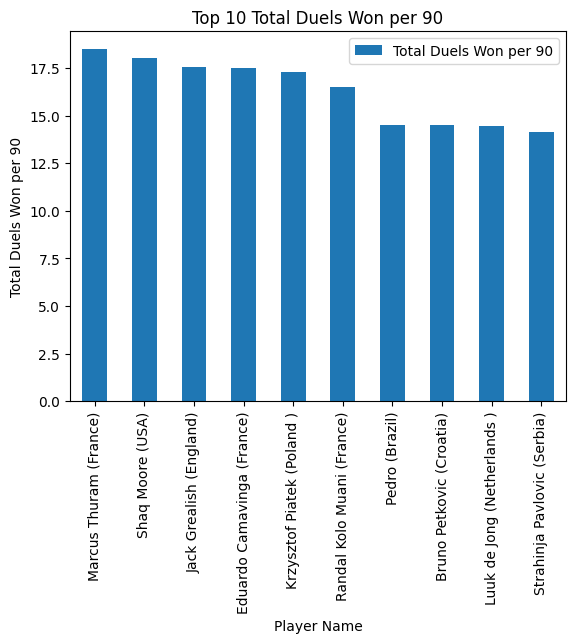

In [81]:
# Let's see some data :D
columns = ['Dribbles per 90','Interceptions per 90','Tackles per 90','Total Duels Won per 90']
for i in columns:
    tops(dfInfer, i)

In [82]:
dfInfer.corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_24240\1909004762.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfInfer.corr()


,FIFA Ranking,National Team Jersey Number,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets
FIFA Ranking,1.000000,0.025614,-0.325883,-0.149986,-0.174923,-0.010970,-0.044161,-0.094476,-0.170000,-0.033783,-0.076146
National Team Jersey Number,0.025614,1.000000,-0.158860,-0.027760,-0.032640,0.034131,-0.045564,-0.034107,-0.069413,-0.100025,-0.100278
Appearances,-0.325883,-0.158860,1.000000,0.351629,0.363175,0.219032,0.087790,0.274689,0.470536,0.113988,0.117609
Goals Scored,-0.149986,-0.027760,0.351629,1.000000,0.366386,0.197491,0.030871,0.004964,0.198562,-0.067248,-0.048143
Assists Provided,-0.174923,-0.032640,0.363175,0.366386,1.000000,0.232589,0.073738,0.048522,0.176991,-0.065643,-0.046994
Dribbles per 90,-0.010970,0.034131,0.219032,0.197491,0.232589,1.000000,0.019983,0.101528,0.221535,-0.083528,-0.059798
Interceptions per 90,-0.044161,-0.045564,0.087790,0.030871,0.073738,0.019983,1.000000,0.097223,0.102696,-0.052136,-0.037324
Tackles per 90,-0.094476,-0.034107,0.274689,0.004964,0.048522,0.101528,0.097223,1.000000,0.517390,-0.148928,-0.106618
Total Duels Won per 90,-0.170000,-0.069413,0.470536,0.198562,0.176991,0.221535,0.102696,0.517390,1.000000,-0.198765,-0.141409
Save Percentage,-0.033783,-0.100025,0.113988,-0.067248,-0.065643,-0.083528,-0.052136,-0.148928,-0.198765,1.000000,0.731722


C:\Users\asus\AppData\Local\Temp\ipykernel_24240\1234926877.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfInfer.corr(), annot=True, annot_kws={'size': 8})


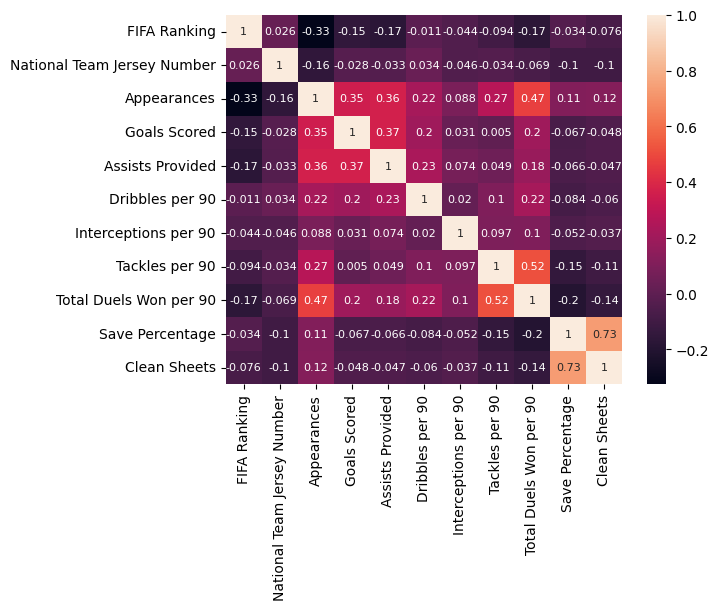

In [83]:
#correletion heat map
import seaborn as sns
sns.heatmap(dfInfer.corr(), annot=True, annot_kws={'size': 8})
plt.show()